## 1- Input (Problema do negocio)
    a. Problema do nogocio
    b. Questao que serao respondidas
    c. Dados de entrada/ fonte de dados

## 2- Output (Produto de Dados)
    a. Analise do dados
    b. Algoritimos de machine learning
    c. Dash board em algumas ferramentas de visualizacao

## 3- Task (Tarefas)
    a. Plano de Execuçao
    b. Ferramentas    


# PA 006 Bank Marketing Strategy

# Planejamento da Solucao

## Input

vove fio contratado como cientista de dados consultor para criar um produto de dados que cria uma sguimentacao de clientes que direcionara a estrategia de marketing e os resultados eserados de seu trabalho de consultoria sao os seguintes :

    1. Criar uma seguimentacao de clientes baseados em criterios de selecao.
    2. Tornar a sguimentacao acessivel para o time de operacoes.
    3. Ensinar o time de Operacao de como usar a sua solucao.
    4. Transferir o conhecimento para os cientistas de Dados da Internacional bank.
    5. Recomendar  de 2 a 3 alavancas de negocio para cada seguimento de clientes.
    


## Output

    - Ferramentas
      * Metabase
      * Streamlit
    - URL para o time de operacoes testar
    - Downloading dos dados selecionados  


## Tasks

- Descrição dos dados
    * Substituição de NA's.
    * Detecção de Outliers.
- EDA
    * Análise Univariada
    * Análise Bivariada
    * Detecação de outliers
    * Seleção de Features
    * Estudo do Espaço
    * Definição do Embedding
- Treinamento dos algoritmos de ML.
    * Análise de Performance
    * Análise de Clustering.
    * Definição dos número de clustering.
- EDA - Insights
    * Explicação das características dos segmentos
- Tabela para armazenar os clientes clusterizados.
    * criacao do notebook de producao
- Criação do notebook de produção.

- Arquitetura da AWS.
    * S3 para armazenar os dados
    * EC2 para armazenar o ETL e a ferramenta de visualização.   
    * DB para armazenar a tabela
    * Cronjob
    * Papermili


# 0.0. IMPORTS

In [1]:
import pandas as pd
import numpy as np
import inflection
import seaborn as sns

from sklearn import metrics
from sklearn import cluster 
from matplotlib import pyplot as plt


## 0.1 Helper Functions

In [2]:
def convert_snekecase(cols_old):
    snakecase = lambda x: inflection.underscore( x )
    cols_new = list ( map( snakecase, cols_old ))
    return cols_new

## 0.2 Loanding Data

In [3]:
data = pd.read_csv('dataset/cc_general.csv')


# 1.0 Descricao dos Dados

In [4]:
df = data.copy()
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## 1.1 Rename Columns

In [5]:
cols_old = ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
            'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
            'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
            'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
            'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
            'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

cols_new = convert_snekecase(cols_old)

## 1.2. Data Dimensions

In [6]:
print( 'Number of rows: {}'.format(df.shape[0]))
print( 'Number of columns: {}'.format(df.shape[1]))

Number of rows: 8950
Number of columns: 18


## 1.3. Data Types

In [7]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

## 1.4. Check missing values

In [8]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# Q Proporcao que isso representa? fazendo uma copia da coluna e / quantida de de elemente e tera a porcentagem 
df.isna().sum()/ df.shape[0]

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000112
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.034972
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

## 1.5.Replace Missing Values


In [10]:
df = df.dropna()

## 1.6. Descriptive Statistics

Momentos estaticos.

1.estimativas de localizacao
    a. * Media (localiza o centro da nuven de pontos)
    b. * Mediana (ponto central onde eu divido 50% antes do ponto e 50% depois do ponto)
    c. * Minimo (Resume as duas etapas de forma visual)
    d. * Maximo (Resume as duas etapas de forma visual)

2.variabilidade
    a. * Desvio (estimativa de variabiliade)
    b. * Variancia 
    c. * Desvio Padrao (para forma o padrao precisa dos dois anteriores) 
         distancia media que os pontos estao em torno da minha localizacao.
    d. * range ( intervalo, quando meus dados variam entre pontos min e max )

3.skewnnes

4.kurtoses

In [38]:
df.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## 1.7.1. Numerical Atributes


In [35]:
numerical_atributes = df.select_dtypes(include='number')

In [36]:
numerical_atributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance                           8636 non-null   float64
 1   balance_frequency                 8636 non-null   float64
 2   purchases                         8636 non-null   float64
 3   oneoff_purchases                  8636 non-null   float64
 4   installments_purchases            8636 non-null   float64
 5   cash_advance                      8636 non-null   float64
 6   purchases_frequency               8636 non-null   float64
 7   oneoff_purchases_frequency        8636 non-null   float64
 8   purchases_installments_frequency  8636 non-null   float64
 9   cash_advance_frequency            8636 non-null   float64
 10  cash_advance_trx                  8636 non-null   int64  
 11  purchases_trx                     8636 non-null   int64  
 12  credit

## 1.7.2. Categorical Atributes

# 2.0 Data Filtering

# 3.0. - FEATURE ENGINEERING

## 3.1. Mapa Mental de Hipoteses

## 3.2. Criacao das Hipoteses

# EDA Space Study

# Data Preparation

# Feacture DSElection

In [13]:
cols_drop = ['cust_id']
x = df.drop(columns =cols_drop)
# x = df.drop(cols, axis=1)
  

# Hiperparameter Fine Tunesing

## 7.1 K-Means

In [23]:
import warnings
from sklearn.cluster import KMeans
# Suprimir os FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)


clusters = [2,3,4,5,6,7,8]

davies_list = []
silhouette_list = []

for k in clusters:
    
    #  model definition
    kmeans_model = cluster.KMeans( n_clusters=k )
    #  model traning
    kmeans_model.fit( x )
    #  model predct
    labels = kmeans_model.predict( x )
    #  model performace
    sil = metrics.silhouette_score( x, labels )
    dav = metrics.davies_bouldin_score( x, labels )  

    silhouette_list.append( sil )
    davies_list.append( dav ) 

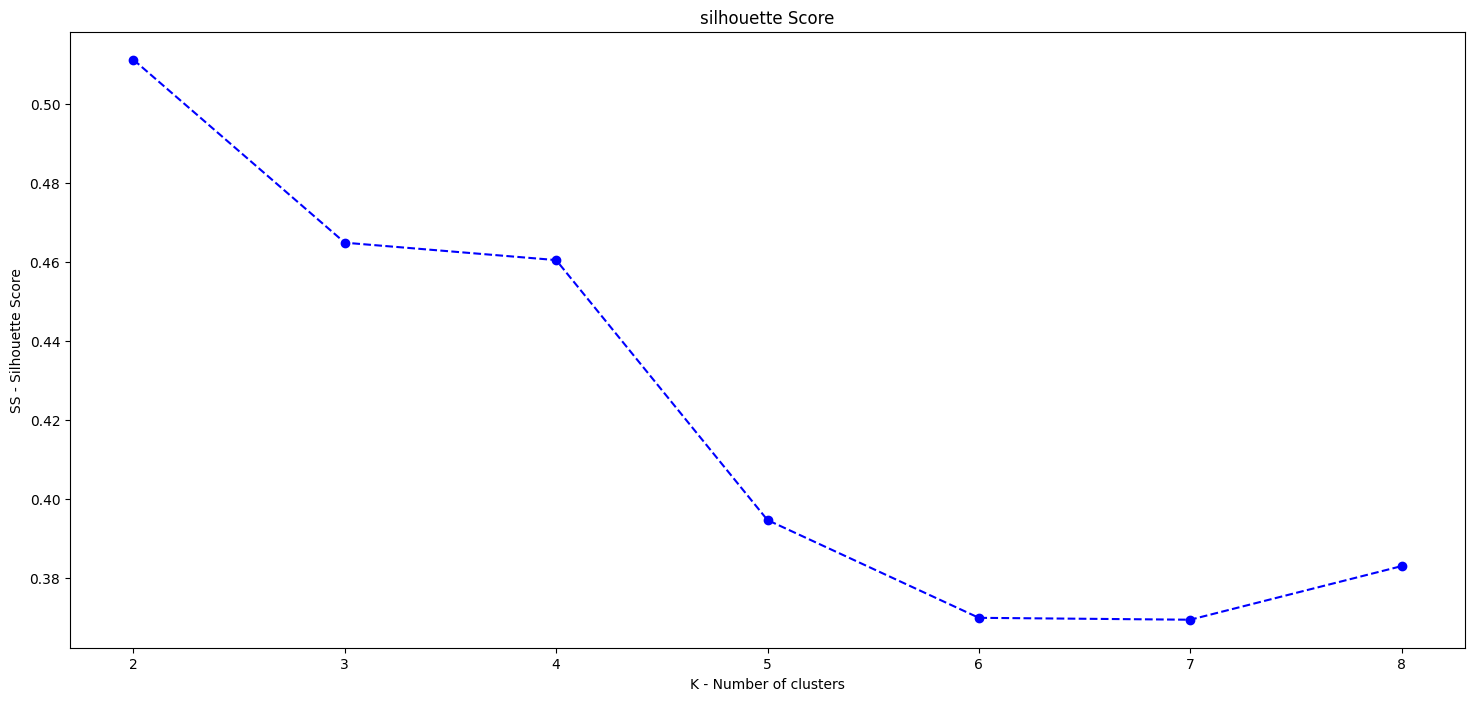

In [21]:
plt.figure( figsize=( 18, 8 ) )
plt.plot( clusters, silhouette_list, linestyle='--', marker='o', color='b')
plt.xlabel('K - Number of clusters')
plt.ylabel('SS - Silhouette Score')
plt.title('silhouette Score');

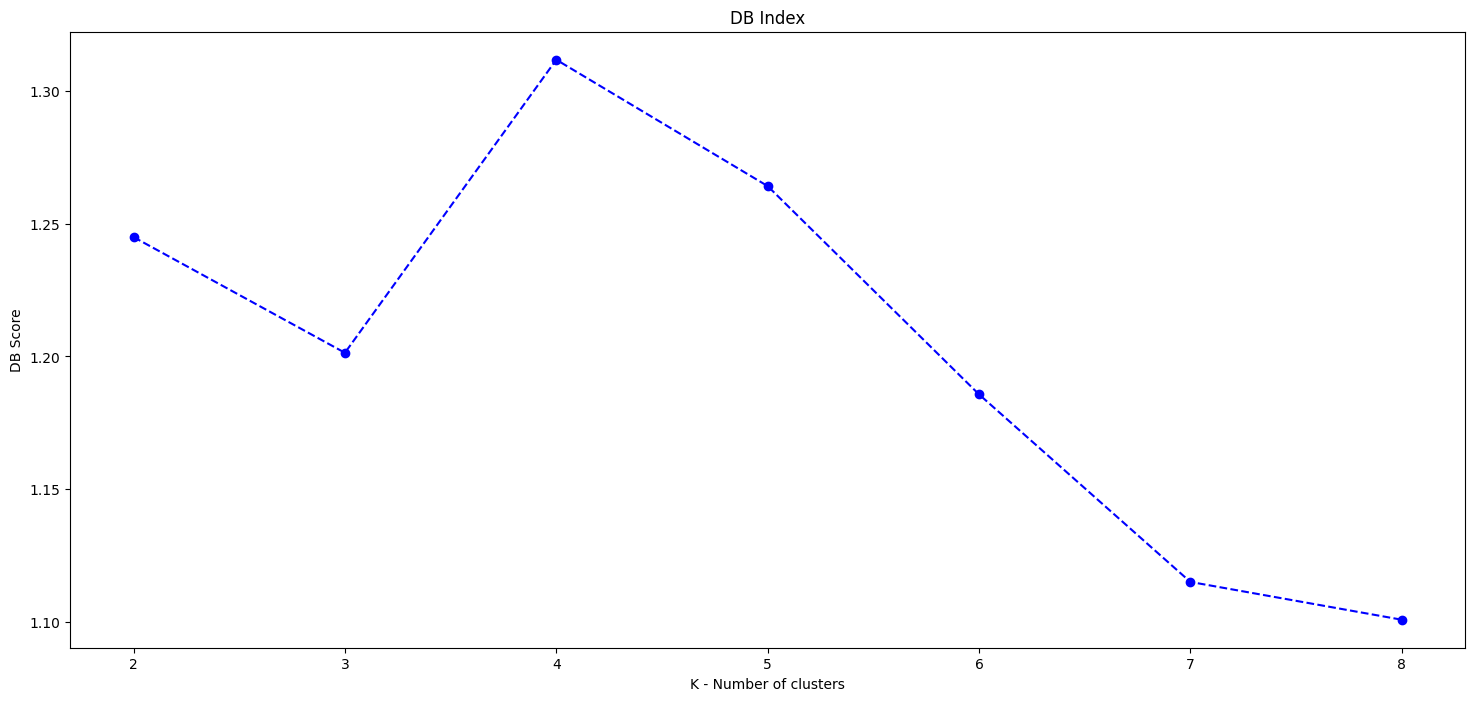

In [24]:
plt.figure( figsize=( 18, 8 ) )
plt.plot( clusters, davies_list, linestyle='--', marker='o', color='b')
plt.xlabel('K - Number of clusters')
plt.ylabel('DB Score')
plt.title('DB Index');

# Machine Leanning traning

# Clustering analistic

# EDA insighist Reports

# Deploy To Production